## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## Load Dataset and Clean Data

In [2]:
df = pd.read_csv('Staphylococcus_aureus_Infection_Data.csv')

# Dropping NA Values
df.dropna(inplace=True)

# Removing Unneeded Data
df.drop(['Unnamed: 0', 'SixWeek_Death', 'ThreeMo_Death', 'SixMo_Death', 'NineMo_Death', 'OneYear_Death'], axis=1, inplace=True)

df.head()

,AGE_GRP,ThirtyDay_Death,Charlson_WIC,Protein 1,Protein 2,Protein 3,Protein 4,Protein 5,Protein 6,Protein 7,...,Protein 2084,Protein 2085,Protein 2086,Protein 2087,Protein 2088,Protein 2089,Protein 2090,Protein 2091,Protein 2092,Protein 2093
1,51-60,False,0.0,0.216912,-0.150886,-0.038081,0.069588,0.336442,-0.104392,0.008110,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,51-60,False,2.0,0.000000,-0.701414,-0.354478,0.135928,-0.349327,-0.003024,-0.098326,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,71-80,True,4.0,0.224415,-0.053709,-0.025547,0.061783,-0.046513,-0.105150,0.096859,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,61-70,False,5.0,-0.080960,-0.480949,-0.345807,0.360044,-0.355281,0.213266,-0.156073,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,51-60,False,1.0,0.013984,-0.350237,-0.163590,-0.095393,0.161053,-0.008987,-0.123618,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
## Coverting AGE_GRP
df = df.replace('00-10', 0)
df = df.replace('11-20', 11)
df = df.replace('21-30', 21)
df = df.replace('31-40', 31)
df = df.replace('41-50', 41)
df = df.replace('51-60', 51)
df = df.replace('61-70', 61)
df = df.replace('71-80', 71)
df = df.replace('80+', 81)

df.head()

,AGE_GRP,ThirtyDay_Death,Charlson_WIC,Protein 1,Protein 2,Protein 3,Protein 4,Protein 5,Protein 6,Protein 7,...,Protein 2084,Protein 2085,Protein 2086,Protein 2087,Protein 2088,Protein 2089,Protein 2090,Protein 2091,Protein 2092,Protein 2093
1,51,False,0.0,0.216912,-0.150886,-0.038081,0.069588,0.336442,-0.104392,0.008110,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,51,False,2.0,0.000000,-0.701414,-0.354478,0.135928,-0.349327,-0.003024,-0.098326,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,71,True,4.0,0.224415,-0.053709,-0.025547,0.061783,-0.046513,-0.105150,0.096859,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,61,False,5.0,-0.080960,-0.480949,-0.345807,0.360044,-0.355281,0.213266,-0.156073,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,51,False,1.0,0.013984,-0.350237,-0.163590,-0.095393,0.161053,-0.008987,-0.123618,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Generate Independent & Dependent Variables

In [4]:
X = df.drop('ThirtyDay_Death', axis=1)
Y = df['ThirtyDay_Death']



# Selecting Best 20 Features
Selector = SelectKBest(f_classif, k=20)
X = Selector.fit_transform(X, Y)

C:\Users\david\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [2093 2094] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\david\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


## Generate Train-Test Split (30% Test/70% Train)

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

# apply random oversampling to the minority class
ros = RandomOverSampler(random_state=42)
X_train_resampled, Y_train_resampled = ros.fit_resample(X_train, Y_train)

# Scale Data for Tree-Based Model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

## Model Training and Testing

In [6]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_scaled, Y_train_resampled)
clf.score(X_train_scaled, Y_train_resampled)

1.0

In [7]:
Y_prediction = clf.predict(X_test_scaled)

<AxesSubplot:>

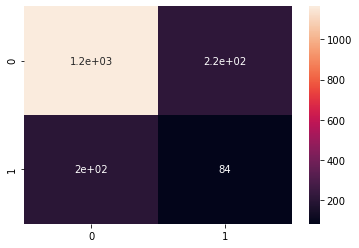

In [8]:
conf_matrix = confusion_matrix(Y_test, Y_prediction)
sns.heatmap(conf_matrix, annot=True)

In [9]:
accuracy_score(Y_test, Y_prediction)

0.7489489489489489